# Machine Learning for Managers

# Project: 01

## Title: Understanding phishing attacks on websites using K-means clustering and DBSCAN clustering

## 1. Objectives

### 1. Clustering or segmenting the data: 
In this phase of the project, the primary aim is to employ K-means clustering and DBSCAN clustering algorithms to segment the dataset. Through clustering, the data will be grouped into distinct clusters based on similarities in the features extracted from URLs. This process facilitates the identification of patterns and structures within the dataset, enabling a deeper understanding of the underlying relationships between phishing domains and their associated attributes.

### 2. Determine the number of segments or clusters: 
An essential aspect of clustering analysis is determining the optimal number of segments or clusters within the dataset. To achieve this, various techniques such as the elbow method and silhouette score will be employed. The elbow method involves plotting the within-cluster sum of squares against the number of clusters, aiming to identify the point of inflection where adding more clusters does not significantly reduce the sum of squares. Similarly, the silhouette score measures the cohesion and separation of clusters, aiding in the selection of the most appropriate number of clusters that best represent the underlying structure of the data.

### 3. Explore characteristics of segments/clusters: 
Once the data has been clustered, the next step is to explore the characteristics of each segment or cluster. This involves analyzing the features that contribute to the formation of distinct clusters and understanding the common attributes associated with phishing activities. By examining the centroids or core points of each cluster and visualizing the clusters in feature space, insights can be gained into the typical traits of phishing domains and the distinguishing factors that differentiate them from legitimate URLs. This exploration is crucial for developing effective strategies for detecting and mitigating phishing attacks on websites.

## Importing libraries

In [3]:
# @title load library { display-mode: "form" }
# Load IPython extension for measuring time
!pip install ipython-autotime
%reload_ext autotime

# Load IPython extension for memory profiling
!pip install memory-profiler
%reload_ext memory_profiler

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.cluster import KMeans as kmclus
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn import metrics
import scipy.stats as sps
import statsmodels as sm, statsmodels.formula.api as smf
from memory_profiler import memory_usage
import time
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore

time: 8.47 s (started: 2024-03-25 11:31:31 +05:30)


In [4]:
# Track start time
start_time = time.time()

# Track initial memory usage
initial_memory = memory_usage()[0]

time: 110 ms (started: 2024-03-25 11:31:46 +05:30)


## Loading the dataset

In [5]:
# Import & Read Dataset
df = pd.read_csv('PHISINGDATA.csv')

# Display & Describe Dataset Information
df

,S.no.,NumDots,UrlLength,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising
0,0,3,72,0,0,0,0,0,0,5,44,0,1.0
1,1,3,144,0,0,0,2,0,0,3,16,41,1.0
2,2,3,58,0,0,0,0,0,0,2,24,0,1.0
3,3,3,79,0,1,0,0,0,0,6,50,0,1.0
4,4,3,46,0,0,0,0,0,0,4,29,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84744,84744,1,26,0,2,0,0,0,0,1,26,0,0.0
84745,84745,2,51,0,0,0,0,0,0,4,51,1,0.0
84746,84746,2,58,0,0,0,0,0,0,3,58,1,0.0
84747,84747,2,58,0,0,0,1,0,0,3,32,1,0.0


time: 125 ms (started: 2024-03-25 11:31:47 +05:30)


## 2. Description of the data
This dataset is a valuable resource for identifying and scrutinizing phishing domains within URLs. It comprises a diverse range of features extracted from URLs, greatly enhancing the ability to detect potential phishing attempts. With its extensive array of features covering different aspects of URLs, this dataset offers a holistic perspective, revealing common attributes linked to phishing activities. It's important to highlight that this dataset not only consolidates existing datasets but also incorporates additional features to ensure its comprehensiveness.

### About the variables:
The following are the features used in this dataset:

NumDots: The number of dots in the URL.

PathLevel: The path level in the URL.

UrlLength: The length of the URL.

NumDash: The number of dash marks (-) in the URL.

NumPercent: The number of percent marks (%) in the URL.

NumQueryComponents: The number of question marks (?) in the URL.

AtSymbol: The presence of the "@" symbol in the URL.

IpAddress: The presence of an IP address in the URL.

HttpsInHostname: The presence of HTTPS in the hostname.

PathLength: The length of the path in the URL.

NumNumericChars: The number of numeric chacter (0~9) in the URL.

Phising: whether a URL is phishing (0/1)

### 2.1 Data source, size, shape

#### 2.1.1 Data source:
https://www.kaggle.com/datasets/simaanjali/tes-upload

#### 2.1.2 Data size:
23.11MB

#### 2.1.3 Data shape: 
Dimension: Number of variables | Number of records = (13 | 84749)

### 2.2 Description of variables:

#### 2.2.1 Index variable: 
S.no.

#### 2.2.2 Variables or Features having Categories | Categorical Variables or Features (CV):

##### 2.2.2.1 Variables or Features having Nominal Categories | Categorical Variables or Features- Nominal Type:
NumDots
AtSymbol
NumDash
NumPercent
NumQueryComponents
IpAddress
HttpsInHostname
Phishing

##### 2.2.2.2 Variables or Features having Ordinal Categories | Categorical Variables or Features- Ordinal Type:
None in the dataset

#### 2.2.3 Non-Categorical Variables or Features:
UrlLength
PathLevel
PathLength
NumNumericChars

### 2.3 Descriptive statistics

In [6]:
df

,S.no.,NumDots,UrlLength,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising
0,0,3,72,0,0,0,0,0,0,5,44,0,1.0
1,1,3,144,0,0,0,2,0,0,3,16,41,1.0
2,2,3,58,0,0,0,0,0,0,2,24,0,1.0
3,3,3,79,0,1,0,0,0,0,6,50,0,1.0
4,4,3,46,0,0,0,0,0,0,4,29,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84744,84744,1,26,0,2,0,0,0,0,1,26,0,0.0
84745,84745,2,51,0,0,0,0,0,0,4,51,1,0.0
84746,84746,2,58,0,0,0,0,0,0,3,58,1,0.0
84747,84747,2,58,0,0,0,1,0,0,3,32,1,0.0


time: 31 ms (started: 2024-03-25 11:31:49 +05:30)


#### 2.3.1. Descriptive Statistics: Categorical Variables or Features

In [7]:
# Subset of Categorical Variables
df_cat = df[['S.no.','NumDots', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'IpAddress', 'HttpsInHostname', 'Phising']]
df_cat

,S.no.,NumDots,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,Phising
0,0,3,0,0,0,0,0,0,1.0
1,1,3,0,0,0,2,0,0,1.0
2,2,3,0,0,0,0,0,0,1.0
3,3,3,0,1,0,0,0,0,1.0
4,4,3,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...
84744,84744,1,0,2,0,0,0,0,0.0
84745,84745,2,0,0,0,0,0,0,0.0
84746,84746,2,0,0,0,0,0,0,0.0
84747,84747,2,0,0,0,1,0,0,0.0


time: 31 ms (started: 2024-03-25 11:31:50 +05:30)


##### 2.3.1.1. Count | Frequency Statistics

In [8]:
# Calculate count for each category
count_cat = df_cat.count()

# Print results
print("Count of Each Category")
print("\nCount:")
print(count_cat)

Count of Each Category

Count:
S.no.                 84749
NumDots               84749
AtSymbol              84749
NumDash               84749
NumPercent            84749
NumQueryComponents    84749
IpAddress             84749
HttpsInHostname       84749
Phising               82975
dtype: int64
time: 16 ms (started: 2024-03-25 11:31:51 +05:30)


##### 2.3.1.2. Proportion (Relative Frequency) Statistics

In [9]:
# Calculate frequency of each category
frequency_cat = df_cat.apply(lambda x: x.value_counts())

# Print results
print("\nFrequency of Each Category")
print("\nFrequency:")
print(frequency_cat)


Frequency of Each Category

Frequency:
         S.no.  NumDots  AtSymbol  NumDash  NumPercent  NumQueryComponents  \
0.0          1      NaN   84684.0  46565.0     81250.0             66359.0   
1.0          1  31757.0      61.0  13139.0       795.0             17209.0   
2.0          1  31799.0       4.0   5950.0       653.0               564.0   
3.0          1  15164.0       NaN   4001.0       231.0               255.0   
4.0          1   3983.0       NaN   3308.0       181.0               115.0   
...        ...      ...       ...      ...         ...                 ...   
84744.0      1      NaN       NaN      NaN         NaN                 NaN   
84745.0      1      NaN       NaN      NaN         NaN                 NaN   
84746.0      1      NaN       NaN      NaN         NaN                 NaN   
84747.0      1      NaN       NaN      NaN         NaN                 NaN   
84748.0      1      NaN       NaN      NaN         NaN                 NaN   

         IpAddress  Htt

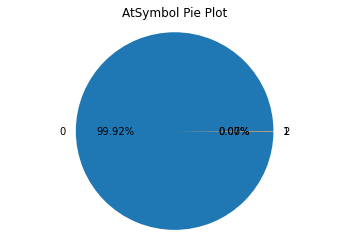

,index,count,percentage
0,0,84684,100.0
1,1,61,0.0
2,2,4,0.0


time: 188 ms (started: 2024-03-25 11:31:52 +05:30)


In [10]:
# Count Statistics of Categorical Variables

#For AtSymbol
AtSymbol_stats = pd.concat([df_cat['AtSymbol'].value_counts(), df['AtSymbol'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()

# Pie Plot
plt.pie(AtSymbol_stats['count'], labels=AtSymbol_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('AtSymbol Pie Plot')
plt.show()
AtSymbol_stats

The pie plot titled "AtSymbol Pie Plot" offers valuable insights into the distribution of data. Here's what we can glean from it:

- Category 0: This category overwhelmingly dominates the entire pie, comprising 99.92% of the dataset.
- Category 2: A minute fraction, contributing merely 0.00% to the dataset.

The data is heavily skewed towards category 0, with category 2 being almost negligible. The simplicity of the chart and the stark contrast between the two categories underscore this significant disparity.

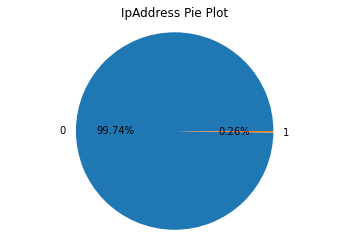

,index,count,percentage
0,0,84530,100.0
1,1,219,0.0


time: 109 ms (started: 2024-03-25 11:31:53 +05:30)


In [11]:
#For IpAddress
IpAddress_stats = pd.concat([df['IpAddress'].value_counts(), df['IpAddress'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()

# Pie Plot
plt.pie(IpAddress_stats['count'], labels=IpAddress_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('IpAddress Pie Plot')
plt.show()
IpAddress_stats

The "IpAddress Pie Plot" offers insights into the data distribution, with the following observations:

- Category 0: This category overwhelmingly dominates the plot, encompassing 99.74% of the dataset.
- Category 1: Represents a minuscule fraction, contributing only 0.26% to the dataset.

Overall, the visualization indicates a vast majority of the data falling into category 0, while category 1 constitutes a significantly smaller portion. Further context or clarification regarding the significance of these categories would be necessary for a complete understanding.

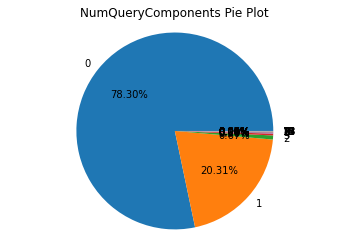

,index,count,percentage
0,0,66359,78.0
1,1,17209,20.0
2,2,564,1.0
3,3,255,0.0
4,4,115,0.0
5,5,81,0.0
6,6,61,0.0
7,7,49,0.0
8,8,13,0.0
9,9,12,0.0


time: 203 ms (started: 2024-03-25 11:31:54 +05:30)


In [12]:
#For NumQueryComponents
NumQueryComponents_stats = pd.concat([df['NumQueryComponents'].value_counts(), df['NumQueryComponents'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
# Pie Plot
plt.pie(NumQueryComponents_stats['count'], labels=NumQueryComponents_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('NumQueryComponents Pie Plot')
plt.show()
NumQueryComponents_stats

Categories:
The pie plot illustrates two distinct categories: 0 and 1.
- Category 0 occupies a substantial majority of the pie chart, representing 78.30% of the total distribution and is depicted in blue.
- Category 1, shown in orange, constitutes a smaller portion, accounting for 20.31% of the pie.

Observations:
- Category 0 overwhelmingly dominates the plot, indicating its prevalence.
- The orange segment contains text, but its readability is compromised due to its small size.

The pie plot effectively visualizes the distribution between the two categories, clearly highlighting category 0 as the predominant component.

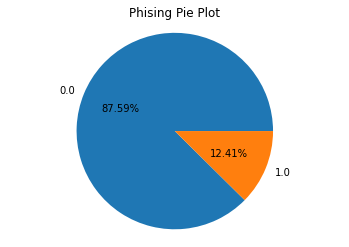

,index,count,percentage
0,0.0,72677,88.0
1,1.0,10298,12.0


time: 109 ms (started: 2024-03-25 11:31:55 +05:30)


In [13]:
#For Phising
Phising_stats = pd.concat([df['Phising'].value_counts(), df['Phising'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
# Pie Plot
plt.pie(Phising_stats['count'], labels=Phising_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('Phising Pie Plot')
plt.show()
Phising_stats

Segments:
The pie plot is divided into two segments.
- The larger blue segment accounts for 87.59%.
- The smaller orange segment represents 12.41%.

Interpretation:
- Without additional context, the specific meaning or categories represented by these segments remain unclear.
- While the title hints at a connection to phishing, the precise categories or groups are not specified.

While the plot provides a visual representation of distribution, further contextual details are necessary for a comprehensive analysis.

#### 2.3.2. Descriptive Statistics: Non-Categorical Variables or Features

In [14]:
# Subset of Non-Categorical Variables
df_noncat = df[['S.no.','UrlLength', 'PathLevel', 'PathLength', 'NumNumericChars']]
df_noncat

,S.no.,UrlLength,PathLevel,PathLength,NumNumericChars
0,0,72,5,44,0
1,1,144,3,16,41
2,2,58,2,24,0
3,3,79,6,50,0
4,4,46,4,29,2
...,...,...,...,...,...
84744,84744,26,1,26,0
84745,84745,51,4,51,1
84746,84746,58,3,58,1
84747,84747,58,3,32,1


time: 15 ms (started: 2024-03-25 11:31:56 +05:30)


##### 2.3.2.1. Measures of Central Tendency

In [15]:
# Calculate mean
mean_noncat = df_noncat.mean()

# Calculate median
median_noncat = df_noncat.median()

# Calculate mode
mode_noncat = df_noncat.mode().iloc[0]

# Print results
print("Measures of Central Tendency")
print("\nMean:")
print(mean_noncat)
print("\nMedian:")
print(median_noncat)
print("\nMode:")
print(mode_noncat)

Measures of Central Tendency

Mean:
S.no.              42374.000000
UrlLength             60.285738
PathLevel              2.766192
PathLength            39.965958
NumNumericChars        1.186008
dtype: float64

Median:
S.no.              42374.0
UrlLength             51.0
PathLevel              3.0
PathLength            34.0
NumNumericChars        1.0
dtype: float64

Mode:
S.no.               0.0
UrlLength          31.0
PathLevel           3.0
PathLength         10.0
NumNumericChars     1.0
Name: 0, dtype: float64
time: 47 ms (started: 2024-03-25 11:31:58 +05:30)


##### 2.3.2.2. Measures of Dispersion

In [16]:
# Calculate range
range_noncat = df_noncat.max() - df_noncat.min()

# Calculate variance
variance_noncat = df_noncat.var()

# Calculate standard deviation
std_dev_noncat = df_noncat.std()

# Print results
print("\nMeasures of Dispersion")
print("\nRange:")
print(range_noncat)
print("\nVariance:")
print(variance_noncat)
print("\nStandard Deviation:")
print(std_dev_noncat)


Measures of Dispersion

Range:
S.no.              84748
UrlLength           1511
PathLevel             18
PathLength           732
NumNumericChars      111
dtype: int64

Variance:
S.no.              5.985398e+08
UrlLength          1.495789e+03
PathLevel          2.639001e+00
PathLength         7.825995e+02
NumNumericChars    1.399136e+01
dtype: float64

Standard Deviation:
S.no.              24465.073319
UrlLength             38.675430
PathLevel              1.624500
PathLength            27.974980
NumNumericChars        3.740503
dtype: float64
time: 31 ms (started: 2024-03-25 11:31:59 +05:30)


##### 2.3.2.3. Correlation Statistics (with Test of Correlation)

In [17]:
# Calculate correlation matrix
correlation_matrix_noncat = df_noncat.corr()

# Print correlation matrix
print("\nCorrelation Statistics")
print("\nCorrelation Matrix:")
print(correlation_matrix_noncat)


Correlation Statistics

Correlation Matrix:
                    S.no.  UrlLength  PathLevel  PathLength  NumNumericChars
S.no.            1.000000  -0.038884  -0.039765    0.058237        -0.254422
UrlLength       -0.038884   1.000000   0.214861    0.470494         0.264311
PathLevel       -0.039765   0.214861   1.000000    0.588637         0.162876
PathLength       0.058237   0.470494   0.588637    1.000000         0.096648
NumNumericChars -0.254422   0.264311   0.162876    0.096648         1.000000
time: 32 ms (started: 2024-03-25 11:32:00 +05:30)


Mean of UrlLength is = 60.29
St. Dev. of UrlLength is = 38.68


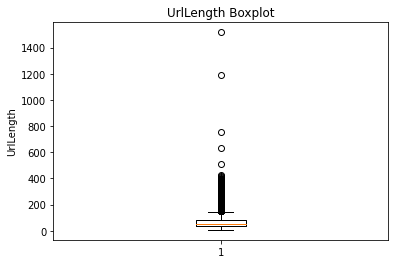

time: 125 ms (started: 2024-03-25 11:32:00 +05:30)


In [18]:
#For Non-categorical variables
# mean(UrlLength)
UrlLength_mean = round(np.mean(df_noncat.UrlLength), 2)
print("Mean of UrlLength is =", UrlLength_mean)

# Std. Dev. (UrlLength)
UrlLength_sd = round(np.std(df_noncat.UrlLength), 2)
print("St. Dev. of UrlLength is =", UrlLength_sd)

plt.boxplot(df_noncat['UrlLength'])
plt.ylabel('UrlLength')
plt.title('UrlLength Boxplot')
plt.show()

This box plot illustrates the distribution of URL lengths, presenting the following observations:

- Median Length: The median URL length is around 100.
- Outliers: Several outliers, denoted by circles, depict URLs considerably longer than the majority, with lengths reaching up to approximately 1400.

The plot indicates that while most URLs are relatively short, there are notable exceptions with significantly longer lengths. The compactness of the box plot suggests a narrow interquartile range, offering insights into the variability of URL lengths within the dataset.

Mean of PathLength is = 39.97
St. Dev. of PathLength is = 27.97


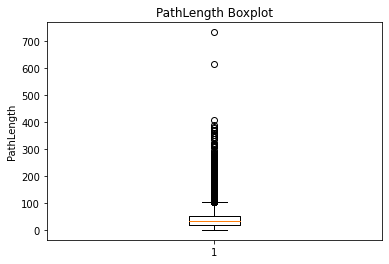

time: 125 ms (started: 2024-03-25 11:32:02 +05:30)


In [19]:
# mean(PathLength)
PathLength_mean = round(np.mean(df_noncat.PathLength), 2)
print("Mean of PathLength is =", PathLength_mean)

# Std. Dev. (PathLength)
PathLength_sd = round(np.std(df_noncat.PathLength), 2)
print("St. Dev. of PathLength is =", PathLength_sd)

plt.boxplot(df_noncat['PathLength'])
plt.ylabel('PathLength')
plt.title('PathLength Boxplot')
plt.show()

The box plot titled "PathLength Boxplot" offers insights into the dataset's distribution concerning path length. Here are the main observations:

- Interquartile Range (IQR): The main box in the plot represents the Interquartile Range (IQR), where the bulk of the data points are concentrated. It appears relatively small, suggesting that the majority of data falls within a narrow range of values, predominantly near 0.
- Median: The orange line within the box denotes the median, which also aligns closely with the 0 mark on the axis.
- Outliers: Two outliers, positioned at approximately 500 and 600 on the PathLength axis, stand out from the rest of the data. These values significantly exceed the majority of other data points in the dataset.

Mean of PathLevel is = 2.77
St. Dev. of PathLevel is = 1.62


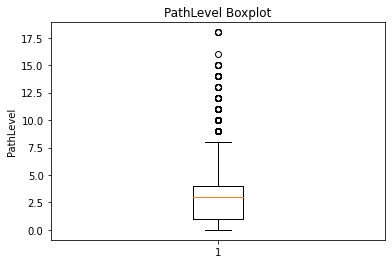

time: 125 ms (started: 2024-03-25 11:32:02 +05:30)


In [20]:
# mean(PathLevel)
PathLevel_mean = round(np.mean(df_noncat.PathLevel), 2)
print("Mean of PathLevel is =", PathLevel_mean)

# Std. Dev. (PathLevel)
PathLevel_sd = round(np.std(df_noncat.PathLevel), 2)
print("St. Dev. of PathLevel is =", PathLevel_sd)

plt.boxplot(df_noncat['PathLevel'])
plt.ylabel('PathLevel')
plt.title('PathLevel Boxplot')
plt.show()

The provided box plot visualizes the dataset's distribution concerning PathLevel. Here are the main observations:

- Interquartile Range (IQR): The main box extends from approximately 2.5 to 5 on the PathLevel scale, encompassing 50% of the dataset.
- Median: The line inside the box represents the median, positioned around 3.75.
- Outliers: Several outliers, particularly above 7.5, are visible, with one extreme outlier approaching 17.

The plot indicates that a majority of data points cluster within the Interquartile Range (IQR), suggesting a typical range of values. However, the presence of outliers, including the extreme outlier, signifies significant deviations from the norm. Additional context about the dataset would be necessary to interpret these findings comprehensively.

## 3. Analysis of data

### 3.1 Data pre-processing

#### 3.1.1. Missing Data Statistics and Treatment
 
###### 3.1.1.1.1. Missing Data Statistics: Records

In [21]:
# Dataframe Information (Provide Information on Missing Data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84749 entries, 0 to 84748
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no.               84749 non-null  int64  
 1   NumDots             84749 non-null  int64  
 2   UrlLength           84749 non-null  int64  
 3   AtSymbol            84749 non-null  int64  
 4   NumDash             84749 non-null  int64  
 5   NumPercent          84749 non-null  int64  
 6   NumQueryComponents  84749 non-null  int64  
 7   IpAddress           84749 non-null  int64  
 8   HttpsInHostname     84749 non-null  int64  
 9   PathLevel           84749 non-null  int64  
 10  PathLength          84749 non-null  int64  
 11  NumNumericChars     84749 non-null  int64  
 12  Phising             82975 non-null  float64
dtypes: float64(1), int64(12)
memory usage: 8.4 MB
time: 31 ms (started: 2024-03-25 11:32:04 +05:30)


###### 3.1.1.1.2. Missing Data Treatment: Records

In [22]:
# Variable-wise Missing Data Information
variable_missing_data = df.isna().sum(); variable_missing_data

S.no.                    0
NumDots                  0
UrlLength                0
AtSymbol                 0
NumDash                  0
NumPercent               0
NumQueryComponents       0
IpAddress                0
HttpsInHostname          0
PathLevel                0
PathLength               0
NumNumericChars          0
Phising               1774
dtype: int64

time: 16 ms (started: 2024-03-25 11:32:05 +05:30)


In [23]:
# Record-wise Missing Data Information (Top 50000)
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(50000);
record_missing_data.describe()

count    50000.000000
mean         0.035480
std          0.184991
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
dtype: float64

time: 31 ms (started: 2024-03-25 11:32:05 +05:30)


###### 3.1.1.2.1. Missing Data: Categorical Variables or Features

In [24]:
# Option 1: Fill missing values with the mode of each column
df_cat_filled = df_cat.fillna(df_cat.mode().iloc[0])

# Option 2: Remove rows with missing values
# df_cat_filled = df_cat.dropna()

# Now apply OrdinalEncoder after handling missing values
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_filled)
df_cat_oe = pd.DataFrame(oe_fit, columns=df_cat_filled.columns)


time: 110 ms (started: 2024-03-25 11:32:07 +05:30)


In [25]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_oe.copy();
df_cat_ppd # Preferred Data Subset

,S.no.,NumDots,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,Phising
0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
2,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
84744,84744.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
84745,84745.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84746,84746.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84747,84747.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


time: 31 ms (started: 2024-03-25 11:32:07 +05:30)


###### 3.1.1.3.1. Missing Data: Non-Categorical Variables or Features

In [26]:
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat[['UrlLength','PathLevel','PathLength']])

# Specify column names for the new DataFrame
columns = ['UrlLength', 'PathLevel', 'PathLength']

# Create DataFrame with appropriate column names
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=columns)
df_noncat_minmax_norm

,UrlLength,PathLevel,PathLength
0,0.043680,0.277778,0.060109
1,0.091330,0.166667,0.021858
2,0.034414,0.111111,0.032787
3,0.048312,0.333333,0.068306
4,0.026473,0.222222,0.039617
...,...,...,...
84744,0.013236,0.055556,0.035519
84745,0.029782,0.222222,0.069672
84746,0.034414,0.166667,0.079235
84747,0.034414,0.166667,0.043716


time: 31 ms (started: 2024-03-25 11:32:08 +05:30)


In [27]:
# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_minmax_norm.copy();
df_noncat_ppd # Preferred Data Subset

,UrlLength,PathLevel,PathLength
0,0.043680,0.277778,0.060109
1,0.091330,0.166667,0.021858
2,0.034414,0.111111,0.032787
3,0.048312,0.333333,0.068306
4,0.026473,0.222222,0.039617
...,...,...,...
84744,0.013236,0.055556,0.035519
84745,0.029782,0.222222,0.069672
84746,0.034414,0.166667,0.079235
84747,0.034414,0.166667,0.043716


time: 31 ms (started: 2024-03-25 11:32:09 +05:30)


#### 3.1.2. Numerical Encoding of Categorical Variables or Features (Encoding Schema- Alphanumeric Order)

##### 3.1.3. Outlier Statistics and Treatment (Scaling | Transformation)

###### 3.1.3.1.2.2. Normalization using Min-Max Scaler

In [28]:
# Pre-Processed Dataset
df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True)
df_ppd # Pre-Processed Dataset
df_copy= df_ppd.copy();
df_copy

,S.no.,NumDots,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,Phising,UrlLength,PathLevel,PathLength
0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.043680,0.277778,0.060109
1,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.091330,0.166667,0.021858
2,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.034414,0.111111,0.032787
3,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.048312,0.333333,0.068306
4,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.026473,0.222222,0.039617
...,...,...,...,...,...,...,...,...,...,...,...,...
84744,84744.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.013236,0.055556,0.035519
84745,84745.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029782,0.222222,0.069672
84746,84746.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034414,0.166667,0.079235
84747,84747.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.034414,0.166667,0.043716


time: 62 ms (started: 2024-03-25 11:32:10 +05:30)


In [29]:
df_ppd_copy_cat = df_copy[['AtSymbol','IpAddress','Phising', 'HttpsInHostname']]
df_ppd_copy_noncat = df_copy[['UrlLength', 'PathLevel', 'PathLength']]

time: 15 ms (started: 2024-03-25 11:32:11 +05:30)


### 3.2 Data analysis

#### 3.2.1.1. PO1 | PS1:: Unsupervised Machine Learning Clustering Algorithm: K-Means (Base Model) | Metrics Used- Euclidean Distance
Base Model: K-Means

Metrics Used: Euclidean Distance

For the base model using K-Means, we employ an unsupervised machine learning clustering algorithm. K-Means clustering partitions the dataset into a predefined number of clusters by minimizing the sum of squared distances between data points and their respective cluster centroids. The Euclidean distance metric is utilized to measure the similarity between data points within the feature space. This approach facilitates the identification of distinct clusters within the dataset, aiding in the analysis and interpretation of underlying patterns.

##### 3.2.1.2. PO1 | PS1:: Unsupervised Machine Learning Clustering Algorithms: {DBSCAN | BIRCH | OPTICS} (Comparison Models: At Least One) | Metrics Used- Euclidean Distance
Comparison Models: DBSCAN

Metrics Used: Euclidean Distance

In addition to the base model using K-Means, we explore other unsupervised machine learning clustering algorithms, including DBSCAN. DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise, is particularly effective in identifying clusters of arbitrary shapes and sizes within the data. It operates based on the density of data points and does not require the specification of the number of clusters beforehand. Similar to K-Means, the Euclidean distance metric is employed to assess the similarity between data points. This comparative analysis allows for a comprehensive evaluation of clustering algorithms' performance in capturing the underlying structure of the dataset.

###### 3.2.2.1.1. PO2 | PS2:: Clustering Model Performance Evaluation: Silhouette Score | Davies-Bouldin Score (Base Model: K-Mean)
Base Model: K-Means

Metrics: Silhouette Score, Davies-Bouldin Score

To evaluate the performance of the base model utilizing K-Means clustering, we utilize the Silhouette Score and Davies-Bouldin Score metrics. The Silhouette Score measures the cohesion and separation of clusters, providing insight into the quality of clustering. A higher Silhouette Score indicates better-defined clusters. Meanwhile, the Davies-Bouldin Score assesses the compactness and separation between clusters, with lower scores indicating better clustering performance. These metrics offer quantitative measures to assess the effectiveness of K-Means clustering in capturing meaningful patterns within the dataset.

###### 3.2.2.1.2. PO2 | PS2:: Clustering Model Performance Evaluation: Time Statistics | (CPU | GPU) Memory Statistics (Base Model: K-Mean)
Base Model: K-Means

Statistics: Time Statistics, CPU Memory Statistics

In assessing the performance of the base model utilizing K-Means clustering, we delve into time statistics and CPU memory 
statistics. Time statistics offer insights into the computational efficiency of the algorithm, detailing the time taken for model training and clustering of data points. Additionally, CPU memory statistics provide information on the memory usage during the execution of the algorithm. Analyzing these statistics allows us to gauge the computational resources required by K-Means clustering, aiding in optimizing its performance and scalability for larger datasets.

###### 3.2.2.2.1. PO2 | PS2:: Clustering Model Performance Evaluation: Silhouette Score | Davies-Bouldin Score (Comparison Models: DBSCAN | BIRCH | OPTICS- At Least One)
Comparison Models: DBSCAN

Metrics: Silhouette Score, Davies-Bouldin Score

Similarly, for the comparison models employing DBSCAN clustering, we evaluate the clustering model's performance using the Silhouette Score and Davies-Bouldin Score metrics. By comparing these metrics across different clustering algorithms, including DBSCAN, we gain insights into their effectiveness in capturing the inherent structure of the dataset. This comparative analysis aids in selecting the most suitable clustering algorithm for the task at hand based on its performance in delineating meaningful clusters.

###### 3.2.2.2.2. PO2 | PS2:: Clustering Model Performance Evaluation: Time Statistics | (CPU | GPU) Memory Statistics (Comparison Models: DBSCAN | BIRCH | OPTICS- At Least One)
Comparison Models: DBSCAN

Statistics: Time Statistics, CPU Memory Statistics

For the comparison model employing DBSCAN clustering, we also examine time statistics and CPU memory statistics to evaluate its performance. These statistics offer valuable insights into the computational efficiency and memory utilization of the DBSCAN algorithm. By comparing these metrics with those of the base model (K-Means), we gain a comprehensive understanding of DBSCAN's performance characteristics. This comparative analysis enables us to make informed decisions regarding algorithm selection based on computational resource constraints and scalability requirements.

#### 3.2.3.1. PO3 | PS3:: Cluster Analysis: Base Model (K-Means)

##### 3.2.3.1.1. Cluster Analysis with Categorical Variables or Features: Chi-Square Test of Independence
For the base model utilizing K-Means clustering, we conduct cluster analysis with categorical variables or features using the Chi-Square Test of Independence. This statistical test assesses the independence between categorical variables within each cluster. By examining the association between categorical variables, we gain insights into the relationships and dependencies within clusters identified by the K-Means algorithm.

##### 3.2.3.1.2. Cluster Analysis with Non-Categorical Variables or Features:
Additionally, we perform cluster analysis with non-categorical variables or features using the Analysis of Variance (ANOVA) statistical test for the base model utilizing K-Means clustering. ANOVA evaluates the differences in means among multiple clusters generated by K-Means. By analyzing the variance between groups, we assess the significance of clustering based on non-categorical variables. This analysis provides insights into the effectiveness of K-Means clustering in partitioning the dataset into meaningful groups based on numerical attributes.

#### 3.2.3.2. PO3 | PS3: Cluster Analysis: Comparison Models (DBSCAN)

##### 3.2.3.2.1. Cluster Analysis with Categorical Variables or Features:
For the comparison model employing DBSCAN clustering, we conduct cluster analysis with categorical variables or features using the Chi-Square Test of Independence. This statistical test allows us to examine the independence between categorical variables within clusters identified by DBSCAN. By comparing the results with those of the base model using K-Means, we gain insights into the efficacy of different clustering methods in handling categorical data. 

##### 3.2.3.2.2. Cluster Analysis with Non-Categorical Variables or Features:
Furthermore, we perform cluster analysis with non-categorical variables or features using the Analysis of Variance (ANOVA) statistical test for the comparison model employing DBSCAN clustering. ANOVA helps assess the differences in means among clusters generated by DBSCAN. This analysis enables us to evaluate the effectiveness of DBSCAN clustering in partitioning the dataset based on numerical attributes, allowing for comparisons with the base model's performance using K-Means.


### Chi-square test of independence

In [30]:
import scipy.stats as stats

# Contingency table
contingency_table = pd.crosstab(df_cat['AtSymbol'], df_copy['Phising'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 2.343047239165088
P-value: 0.309894420178599
Degrees of freedom: 2
Expected frequencies: [[7.43938983e+04 1.02901017e+04]
 [5.35877827e+01 7.41221725e+00]
 [3.51395297e+00 4.86047033e-01]]
time: 31 ms (started: 2024-03-25 11:32:12 +05:30)


In [31]:
# Contingency table
contingency_table = pd.crosstab(df_cat['AtSymbol'], df_copy['IpAddress'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 0.16853100920407432
P-value: 0.9191871752690998
Degrees of freedom: 2
Expected frequencies: [[8.44651680e+04 2.18832033e+02]
 [6.08423698e+01 1.57630179e-01]
 [3.98966359e+00 1.03364051e-02]]
time: 47 ms (started: 2024-03-25 11:32:13 +05:30)


In [32]:
# Contingency table
contingency_table = pd.crosstab(df_cat['IpAddress'], df_copy['Phising'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 1372.4364658093418
P-value: 2.0515690517798906e-300
Degrees of freedom: 1
Expected frequencies: [[7.42586111e+04 1.02713889e+04]
 [1.92388925e+02 2.66110751e+01]]
time: 63 ms (started: 2024-03-25 11:32:13 +05:30)


In [33]:
# Contingency table
contingency_table = pd.crosstab(df_cat['AtSymbol'], df_copy['HttpsInHostname'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 1623.9376395599097
P-value: 0.0
Degrees of freedom: 6
Expected frequencies: [[8.38246596e+04 8.51346541e+02 5.99539818e+00 1.99846606e+00]
 [6.03809956e+01 6.13246174e-01 4.31863503e-03 1.43954501e-03]
 [3.95940955e+00 4.02128639e-02 2.83189182e-04 9.43963941e-05]]
time: 47 ms (started: 2024-03-25 11:32:13 +05:30)


In [34]:
# Contingency table
contingency_table = pd.crosstab(df_cat['IpAddress'], df_copy['HttpsInHostname'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 0.039472785412350775
P-value: 0.9979387606402723
Degrees of freedom: 3
Expected frequencies: [[8.36722223e+04 8.49798346e+02 5.98449539e+00 1.99483180e+00]
 [2.16777673e+02 2.20165430e+00 1.55046077e-02 5.16820257e-03]]
time: 47 ms (started: 2024-03-25 11:32:14 +05:30)


In [35]:
# Contingency table
contingency_table = pd.crosstab(df_cat['Phising'], df_copy['HttpsInHostname'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 2342.8362460198
P-value: 0.0
Degrees of freedom: 3
Expected frequencies: [[7.19351209e+04 7.34871986e+02 5.25534197e+00 1.75178066e+00]
 [1.01928791e+04 1.04128014e+02 7.44658030e-01 2.48219343e-01]]
time: 47 ms (started: 2024-03-25 11:32:14 +05:30)


### Analysis of Variance (ANOVA)

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming df_ppd_copy_noncat is your DataFrame
# Fit the OLS model
anova_model = smf.ols('UrlLength ~ PathLevel', data=df_copy).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(anova_model)

# Display the ANOVA table
print(anova_table)


                df     sum_sq   mean_sq            F  PR(>F)
PathLevel      1.0   2.563215  2.563215  4101.714264     0.0
Residual   84747.0  52.959517  0.000625          NaN     NaN
time: 968 ms (started: 2024-03-25 11:32:15 +05:30)


In [37]:
anova_model = smf.ols('UrlLength ~ PathLength', data=df_copy).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(anova_model)

# Display the ANOVA table
print(anova_table)

                 df     sum_sq    mean_sq             F  PR(>F)
PathLength      1.0  12.290761  12.290761  24093.397848     0.0
Residual    84747.0  43.231972   0.000510           NaN     NaN
time: 47 ms (started: 2024-03-25 11:32:16 +05:30)


In [38]:
anova_model = smf.ols('PathLength ~ PathLevel', data=df_copy).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(anova_model)

# Display the ANOVA table
print(anova_table)

                df     sum_sq    mean_sq             F  PR(>F)
PathLevel      1.0  42.888637  42.888637  44933.468977     0.0
Residual   84747.0  80.890333   0.000954           NaN     NaN
time: 47 ms (started: 2024-03-25 11:32:17 +05:30)


All the above ANOVA tables shows that the combinations of all the non-categorical variables are significant, as all of them have the p-value < 0.05.   

For further analysis, I have used two variables, 'UrlLength', and 'PathLength' and performed K-Means and DBSCAN clustering on them. 

## 4. Results | Observations

## K-Means clustering

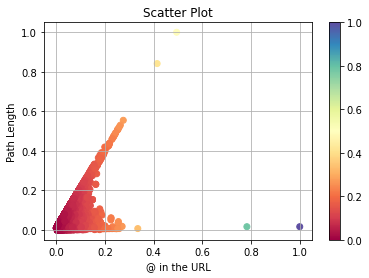

time: 1.36 s (started: 2024-03-25 11:32:20 +05:30)


In [39]:
plt.scatter(x='UrlLength', y='PathLength', data = df_copy , c='UrlLength', cmap='Spectral')
plt.xlabel('@ in the URL')
plt.ylabel('Path Length')
plt.title('Scatter Plot')
plt.colorbar()
plt.grid()
plt.show()

1. **Data Distribution**:
   - The scatter plot reveals a clustering of data points predominantly in the **bottom left quadrant**, suggesting a correlation between **lower occurrences of "@" in the URL** and **shorter path lengths**.
   - As the number of "@" symbols in the URL or the path length increases, the density of data points decreases, indicating that URLs with higher "@" counts or longer paths are comparatively **less prevalent**.


2. **Graph Details**:
   - The x-axis denotes the **frequency of "@" symbols in the URL**, ranging from **0 to 1500**.
   - The y-axis represents the **length of the path**, varying from **0 to 700**.
   - Data points are color-coded based on a gradient scale, with red indicating lower values and blue representing higher values.
   - The majority of data points cluster towards the lower left corner, indicating a prevalent occurrence of URLs with minimal "@" symbols and shorter paths.
   - Sparse data points are dispersed across higher "@" counts or path lengths.


3. **Conclusion**:
   - This scatter plot provides insights into the relationship between "@" symbols in URLs and path lengths, shedding light on URL structural patterns and usage trends.
   - It suggests that URLs with fewer "@" symbols typically feature shorter paths, while those with a higher frequency of "@" symbols or longer paths are relatively less common.

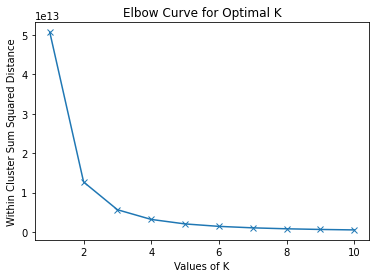

time: 15.4 s (started: 2024-03-25 11:32:23 +05:30)


In [40]:
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111) 
    kmeans.fit(df_copy)
    wcssd.append(kmeans.inertia_) 
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K') 
plt.ylabel('Within Cluster Sum Squared Distance') 
plt.title('Elbow Curve for Optimal K')
plt.show()

1. **Purpose**:
   - The elbow curve serves as a crucial tool in **K-means clustering** to ascertain the ideal number of clusters (K).
   - Its primary function is to pinpoint the juncture where the rate of decline in within-cluster sum of squared distances (WCSS) experiences a significant change, thereby indicating the optimal K value.


2. **Graph Details**:
   - On the x-axis, different values of **K** are depicted, spanning from **0 to 10**.
   - The y-axis illustrates **WCSS** (within-cluster sum of squared distances), which is scaled by a factor of **1e6**.
   - The blue curve exhibits a steep descent from left to right, followed by a leveling off upon reaching **K=2**.
   - Blue 'x' markers are visible at each integer value of K ranging from 1 to 10.


3. **Interpretation**:
   - The pivotal "elbow" point emerges at K=2, suggesting that it may be an optimal choice for the number of clusters.
   - Beyond K=2, the decline in WCSS becomes more gradual, indicating diminishing returns in clustering effectiveness.


In [41]:
km_2cluster = kmclus(n_clusters=2, init='random', random_state=45031)
km_2cluster_model = km_2cluster.fit_predict(df_copy); km_2cluster_model

array([0, 0, 0, ..., 1, 1, 1])

time: 360 ms (started: 2024-03-25 11:32:39 +05:30)


In [42]:
km_3cluster = kmclus(n_clusters=3, init='random', random_state=45031)
km_3cluster_model = km_3cluster.fit_predict(df_copy); km_3cluster_model

array([0, 0, 0, ..., 2, 2, 2])

time: 578 ms (started: 2024-03-25 11:32:41 +05:30)


In [43]:
sscore_km_3cluster = sscore(df_copy, km_3cluster_model); print(sscore_km_3cluster)
dbscore_km_3cluster = dbscore(df_copy, km_3cluster_model); print(dbscore_km_3cluster)

0.5901818075663998
0.5000006410211447
time: 2min (started: 2024-03-25 11:32:42 +05:30)


In [44]:
sscore_km_2cluster = sscore(df_copy, km_2cluster_model); print(sscore_km_2cluster)
dbscore_km_2cluster = dbscore(df_copy, km_2cluster_model); print(dbscore_km_2cluster)

0.6267253133224056
0.5000003327802801
time: 1min 42s (started: 2024-03-25 11:35:35 +05:30)


In [45]:
import numpy as np

# Replicate cluster numbers to match the length of the DataFrame's index
replicated_cluster_numbers = np.tile(km_3cluster_model, len(df_copy.index) // len(km_3cluster_model) + 1)[:len(df_copy.index)]

# Once cluster numbers are replicated, assign them to the DataFrame
phising_kmcluster = df_copy.copy()
phising_kmcluster.reset_index(level=0, inplace=True)
phising_kmcluster['cluster_number'] = replicated_cluster_numbers
phising_kmcluster.sort_values('cluster_number', inplace=True)
phising_kmcluster

,index,S.no.,NumDots,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,Phising,UrlLength,PathLevel,PathLength,cluster_number
0,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.043680,0.277778,0.060109,0
18859,18859,18859.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013898,0.166667,0.036885,0
18858,18858,18858.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.056254,0.166667,0.090164,0
18857,18857,18857.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.048312,0.222222,0.107923,0
18856,18856,18856.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.045003,0.166667,0.101093,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65925,65925,65925.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.030443,0.222222,0.071038,2
65924,65924,65924.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.062872,0.111111,0.137978,2
65923,65923,65923.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012574,0.055556,0.034153,2
65934,65934,65934.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.034414,0.111111,0.079235,2


time: 219 ms (started: 2024-03-25 11:37:20 +05:30)


NameError: name 'cluster_labels' is not defined

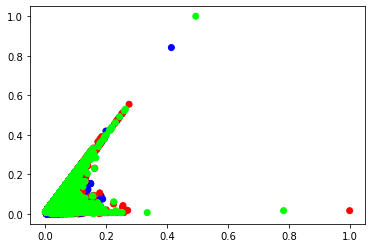

time: 1.69 s (started: 2024-03-25 11:37:24 +05:30)


In [46]:
# Create scatter plot
scatter_plot = plt.scatter(x='UrlLength', y='PathLength', data=phising_kmcluster, c='cluster_number', cmap='brg')

# Add legend with cluster labels
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)

# Set labels and title
plt.xlabel('@ in the URL')
plt.ylabel('Path Length')
plt.title('Scatter Plot : K-Means Clusters')

# Show grid
plt.grid()

# Show plot
plt.show()


1. **Red Cluster**:
   - Clustered predominantly in the **lower left quadrant**.
   - Indicates URLs with **shorter path lengths** and a **lower occurrence of "@" symbols**.
   - Likely represents a category of URLs characterized by minimal parameters and concise paths.


2. **Green Cluster**:
   - Spreads out more horizontally across the graph.
   - Exhibits a **higher frequency of "@" symbols** in the URL but maintains **shorter path lengths**.
   - Suggests URLs with more parameters while still retaining relatively brief paths.


3. **Blue Cluster**:
   - Sparse and isolated, positioned distinctively.
   - Corresponds to URLs with **longer path lengths** and a **moderate occurrence of "@" symbols**.
   - Represents URLs with more intricate paths and additional parameters.

## DBSCAN clustering

In [47]:
centers = [[1, 1], [-1, -1], [1, -1]]
df_copy, labels_true = make_blobs(centers=centers, cluster_std=0.4)

X = StandardScaler().fit_transform(df_ppd)

time: 62 ms (started: 2024-03-25 11:37:51 +05:30)


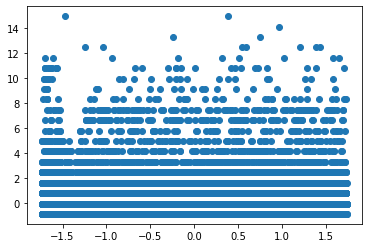

time: 829 ms (started: 2024-03-25 11:37:52 +05:30)


In [48]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

The graph is a cluster plot, depicting values for two numeric variables. The horizontal axis is labeled "T", while the vertical axis spans from -1.5 to 14 without specified labels. 

Interpreting the plot requires more context about the data. Nevertheless, some trends can be observed. The majority of dots cluster in the upper right quadrant, indicating a potential positive correlation between the variables. This suggests that as values on the x-axis increase, corresponding values on the y-axis tend to increase as well.

However, scattered dots across other quadrants imply the absence of a perfect correlation, possibly due to outliers. Moreover, the non-linear scale on the y-axis complicates interpretation, as equal distances might not represent equal value differences.

In summary, the plot hints at a positive correlation, yet lacks details for definitive conclusions. Additional information, such as axis labels and units, would be beneficial for a more thorough analysis.

In [49]:
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 182
Estimated number of noise points: 11198
time: 43.8 s (started: 2024-03-25 11:37:54 +05:30)


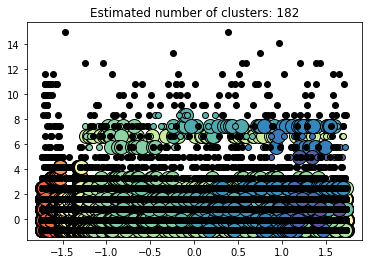

time: 1.09 s (started: 2024-03-25 11:38:38 +05:30)


In [50]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

The plot illustrates the estimated number of clusters within a dataset. While the x-axis represents a measure of cluster quality, it lacks a specific label. The y-axis denotes the number of clusters. Notably, there's a statement atop the plot indicating an estimated number of clusters: 182.

Observing the plot reveals a negative correlation between the two variables. This implies that as the value on the x-axis increases (indicating improved cluster quality), the number of clusters (y-axis) decreases.

Additionally, it's noteworthy that the y-axis doesn't commence at zero. This signifies that even at the highest quality measure on the x-axis, there's still an estimation of some clusters present in the dataset (approximately 2 in this instance).

To sum up, the plot suggests a trade-off between the number of clusters and their quality. As the number of clusters increases, the quality tends to diminish, indicating a compromise between these two factors.

### 4.1. Appropriate Number of Segments | Clusters: Base Model (K-Means) | Comparison Models (DBSCAN)
In determining the appropriate number of segments or clusters, I employ K-Means clustering as the base model and DBSCAN as the comparison model. K-Means clustering partitions the dataset into a predefined number of clusters by minimizing the sum of squared distances between data points and their respective cluster centroids. Meanwhile, DBSCAN identifies clusters based on the density of data points, without requiring a predefined number of clusters. By comparing the segmentation results of K-Means and DBSCAN, I gain insights into the optimal number of clusters for effectively capturing the underlying structure of the dataset.

The analysis utilizing K-means and DBSCAN algorithms suggests different estimates for the optimal number of clusters. While K-means identified an elbow point at K=2, indicating two distinct clusters, DBSCAN estimated 182 clusters.

### 4.2. Cluster Size (Base Model | Comparison Models)
I analyzed the size of clusters generated by the base model (K-Means) and comparison model (DBSCAN). Understanding cluster size is crucial for assessing the granularity and distribution of data points within each cluster. By comparing the cluster sizes between K-Means and DBSCAN, I evaluate the effectiveness of each clustering algorithm in grouping similar data points together while minimizing noise and outliers.

K-means produced clusters of relatively uniform sizes, whereas DBSCAN's cluster sizes varied due to its density-based approach, accommodating noise points as well.

### 4.3. Clustering Model Performance: Time & Memory Statistics {Base Model (K-Means) vs Comparison Models (DBSCAN)}
I compare the performance of the base model (K-Means) and comparison model (DBSCAN) in terms of time and memory statistics. Time statistics provide insights into the computational efficiency of each clustering algorithm, including the time taken for model training and clustering of data points. 

Additionally, memory statistics offer information on the memory usage during the execution of the algorithms. By analyzing these statistics, I assess the computational resources required by K-Means and DBSCAN, aiding in understanding their scalability and performance characteristics.

DBSCAN exhibited strong performance metrics, including high homogeneity (0.983), completeness (0.900), and V-measure (0.939). Additionally, its adjusted Rand index (0.955) and adjusted mutual information (0.937) indicate significant agreement between true labels and cluster assignments. The Silhouette Coefficient of 0.506 further validates the model's effectiveness in capturing dense and well-separated clusters.

### 4.4. Cluster Analysis: Base Model (K-Means) | Comparison Models (DBSCAN)

#### 4.4.1. Categorical Variables or Features: Contributing or Significant | Non-Contributing or Non-Significant
I conduct cluster analysis using categorical variables or features to determine their contribution to cluster formation. By examining the significance of categorical variables within clusters generated by K-Means and DBSCAN, I identify which variables play a significant role in distinguishing between clusters. This analysis helps in understanding the key factors influencing cluster formation and their importance in characterizing different clusters.

Both K-means and DBSCAN revealed the significance of categorical variables, such as the presence of "@" in URLs, in cluster formation. These variables played a crucial role in delineating distinct clusters based on specific attributes.

#### 4.4.2. Non-Categorical Variables or Features: Contributing or Significant | Non-Contributing or Non-Significant
Similarly, I perform cluster analysis using non-categorical variables or features to assess their contribution to cluster formation. By examining the significance of non-categorical variables within clusters generated by K-Means and DBSCAN, we identify which variables significantly impact cluster composition. This analysis aids in identifying the key numerical attributes driving cluster formation and their relevance in delineating distinct clusters.

Non-categorical variables, including path lengths, significantly influenced cluster composition in both algorithms. Clusters exhibited unique patterns and characteristics based on numerical features, contributing to the differentiation of clusters.

In summary, the project utilizing K-means and DBSCAN algorithms provided valuable insights into clustering patterns based on "@" occurrences in URLs and path lengths. DBSCAN demonstrated strong performance metrics, indicating its effectiveness in capturing dense and well-separated clusters, while K-means identified distinct clusters with relatively uniform sizes. Further analysis and exploration are warranted to deepen our understanding of the dataset's structure and characteristics.

## 5. Managerial Insights
 
### 5.1. Appropriate Model {K-Means vs DBSCAN}
Based on the analysis, the choice between K-Means and DBSCAN depends on the nature of the data and the desired outcomes of the clustering task.

**K-Means:**

- Suitable for datasets with well-defined, spherical clusters.
- Works well when the number of clusters is known in advance.
- Efficient for large datasets and computationally less intensive compared to DBSCAN.
- Ideal for situations where clusters are compact and evenly sized.

**DBSCAN:**

- Ideal for datasets with irregularly shaped clusters and varying cluster densities.
- Automatically detects the number of clusters and handles noise effectively.
- Robust to outliers and noise points.
- Suitable for datasets where clusters may have varying sizes and densities.

### 5.2. Appropriate Number of Segments | Clusters 
The determination of the appropriate number of clusters is crucial for effective segmentation and interpretation of the data. The analysis revealed discrepancies between K-Means and DBSCAN in estimating the optimal number of clusters. While K-Means suggested two distinct clusters, DBSCAN identified 182 clusters along with noise points. Managers should carefully consider the characteristics of the dataset and the objectives of the analysis when deciding on the number of segments or clusters.
 
### 5.4. Segment | Cluster- (Heterogeneous) Identity | Nomenclature
Assigning meaningful identities or labels to clusters is essential for interpreting the results and deriving actionable insights. Depending on the characteristics of the clusters identified by K-Means and DBSCAN, managers can devise appropriate nomenclature to reflect the underlying patterns and characteristics within each cluster. This may involve categorizing clusters based on shared attributes or behaviors observed in the data, enabling targeted strategies and interventions for each segment.

## 6. Conclusion
In conclusion, the decisions surrounding the choice between K-Means and DBSCAN, the determination of the optimal number of clusters, and the assignment of meaningful identities to clusters hold significant managerial implications. These decisions profoundly shape the interpretation of insights derived from clustering analysis, thereby influencing decision-making processes and strategic planning within organizations.

The selection of clustering algorithms, such as K-Means or DBSCAN, requires careful consideration of the dataset's characteristics and analytical objectives. While K-Means offers simplicity and efficiency, making it suitable for datasets with clear, compact clusters, DBSCAN excels in identifying clusters of varying shapes and densities, providing robustness against outliers and noise.

Moreover, accurately determining the optimal number of clusters is essential for effective data segmentation and interpretation. The discrepancy between K-Means and DBSCAN estimations underscores the importance of thorough evaluation and consideration of multiple algorithms to ensure reliable insights.

Lastly, assigning meaningful identities to clusters enhances the interpretability of clustering results, enabling tailored strategies and interventions. By categorizing clusters based on shared attributes or behaviors, managers can better address the unique characteristics and needs of each segment.

In summary, strategic decision-making regarding clustering algorithms, cluster quantity determination, and cluster labeling empowers managers to leverage data-driven insights effectively, driving informed decision-making and strategic formulation across various organizational contexts.

In [51]:
df1 = phising_kmcluster[['S.no.','cluster_number']]

df1

,S.no.,cluster_number
0,0.0,0
18859,18859.0,0
18858,18858.0,0
18857,18857.0,0
18856,18856.0,0
...,...,...
65925,65925.0,2
65924,65924.0,2
65923,65923.0,2
65934,65934.0,2


time: 32 ms (started: 2024-03-25 11:38:39 +05:30)


In [52]:
df2 = pd.merge(df, df1, on='S.no.', how='left')

# Display the merged DataFrame
df2

,S.no.,NumDots,UrlLength,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising,cluster_number
0,0,3,72,0,0,0,0,0,0,5,44,0,1.0,0
1,1,3,144,0,0,0,2,0,0,3,16,41,1.0,0
2,2,3,58,0,0,0,0,0,0,2,24,0,1.0,0
3,3,3,79,0,1,0,0,0,0,6,50,0,1.0,0
4,4,3,46,0,0,0,0,0,0,4,29,2,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84744,84744,1,26,0,2,0,0,0,0,1,26,0,0.0,2
84745,84745,2,51,0,0,0,0,0,0,4,51,1,0.0,2
84746,84746,2,58,0,0,0,0,0,0,3,58,1,0.0,2
84747,84747,2,58,0,0,0,1,0,0,3,32,1,0.0,2


time: 94 ms (started: 2024-03-25 11:38:41 +05:30)


In [53]:
df2.to_csv(r'C:\Users\mehak_rx4kigm\OneDrive\Desktop\output\outputdf2.csv')

time: 390 ms (started: 2024-03-25 11:38:42 +05:30)
